In [1]:
from google.colab import files

uploaded = files.upload()


Saving Suicide_Detection.csv to Suicide_Detection.csv


In [2]:
import pandas as pd

# Load the uploaded CSV file
df = pd.read_csv("Suicide_Detection.csv")

# Preview the data
df.head()


,Unnamed: 0,text,class
0,2,Ex Wife Threatening SuicideRecently I left my ...,suicide
1,3,Am I weird I don't get affected by compliments...,non-suicide
2,4,Finally 2020 is almost over... So I can never ...,non-suicide
3,8,i need helpjust help me im crying so hard,suicide
4,9,"I’m so lostHello, my name is Adam (16) and I’v...",suicide


In [3]:
# 🧠 15 Mental Health Questions
questions = [
    "What are the early warning signs of suicidal thoughts in teenagers?",
    "How can I help a friend who talks about self-harm?",
    "What are the common causes of suicidal ideation in young adults?",
    "How do mental health professionals assess suicide risk?",
    "What are the immediate steps to take if someone is suicidal?",
    "Can social media use increase the risk of depression or suicide?",
    "How can schools and universities prevent student suicides?",
    "Is it true that talking about suicide can make someone more likely to act on it?",
    "What mental health resources are available for someone in crisis?",
    "How can family members support someone recovering from a suicide attempt?",
    "What is the role of therapy in suicide prevention?",
    "How does bullying impact mental health and suicidal behavior in teens?",
    "Are there specific signs in social media posts that indicate suicide risk?",
    "What medications are commonly used to treat suicidal depression?",
    "How do cultural factors influence attitudes toward suicide and mental health?"
]

In [5]:
pip install langchain-community


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.5/2.5 MB 38.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 39.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 434.1/434.1 kB 27.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.4/44.4 kB 3.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 50.9/50.9 kB 3.5 MB/s eta 0:00:00
  Attempting uninstall: langchain-core
    Found existing installation: langchain-core 0.3.52
    Uninstalling langchain-core-0.3.52:
      Successfully uninstalled langchain-core-0.3.52
  Attempting uninstall: langchain
    Found existing installation: langchain 0.3.23
    Uninstalling langchain-0.3.23:
      Successfully uninstalled langchain-0.3.23


In [6]:
pip install chromadb sentence-transformers


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.3/67.3 kB 5.6 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.3/18.3 MB 47.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.4/2.4 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 94.9/94.9 kB 5.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 284.2/284.2 kB 9.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.0/2.0 MB 38.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 101.6/101.6 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.0/16.0 MB 90.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 55.9/55.9 kB 3.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 89.1/89.1 kB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 1.5 MB/s eta 0:00:00

In [7]:
# 🔌 Load embedding model & vectorstore
from langchain_community.embeddings import HuggingFaceEmbeddings
from langchain_community.vectorstores import Chroma
from langchain_core.documents import Document

embedding_function = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
vectorstore = Chroma(persist_directory="mental_health_db", embedding_function=embedding_function)

<ipython-input-7-a221181f2956>:6: LangChainDeprecationWarning: The class `HuggingFaceEmbeddings` was deprecated in LangChain 0.2.2 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFaceEmbeddings``.
  embedding_function = HuggingFaceEmbeddings(model_name="all-MiniLM-L6-v2")
/usr/local/lib/python3.11/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warn

modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.5k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

<ipython-input-7-a221181f2956>:7: LangChainDeprecationWarning: The class `Chroma` was deprecated in LangChain 0.2.9 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-chroma package and should be used instead. To use it run `pip install -U :class:`~langchain-chroma` and import as `from :class:`~langchain_chroma import Chroma``.
  vectorstore = Chroma(persist_directory="mental_health_db", embedding_function=embedding_function)


In [8]:
# 🤖 Load instruction-tuned model (LaMini-Flan)
from transformers import AutoModelForSeq2SeqLM, AutoTokenizer, pipeline
from langchain.llms import HuggingFacePipeline

model_name = "MBZUAI/LaMini-Flan-T5-783M"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

text_gen_pipeline = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,
    temperature=0.7,
    top_p=0.95,
    do_sample=True  # <- enables temperature & top_p to take effect
)

llm = HuggingFacePipeline(pipeline=text_gen_pipeline)

tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/860 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cpu
<ipython-input-8-3faf9b8f0fc8>:19: LangChainDeprecationWarning: The class `HuggingFacePipeline` was deprecated in LangChain 0.0.37 and will be removed in 1.0. An updated version of the class exists in the :class:`~langchain-huggingface package and should be used instead. To use it run `pip install -U :class:`~langchain-huggingface` and import as `from :class:`~langchain_huggingface import HuggingFacePipeline``.
  llm = HuggingFacePipeline(pipeline=text_gen_pipeline)


In [9]:
# 🔗 Build RAG Chain (limit to 2 retrieved docs)
from langchain.chains import RetrievalQA
retriever = vectorstore.as_retriever(search_kwargs={"k": 2})

rag_chain = RetrievalQA.from_chain_type(
    llm=llm,
    retriever=retriever,
    return_source_documents=False
)

In [10]:
# 🔁 Run questions through RAG

results = []
for i, question in enumerate(questions, 1):
    try:
        response = rag_chain({"query": question})
        print(f"✅ Q{i}: {question}")
        print(f"🧠 A{i}: {response['result']}\n")
        results.append({"Question": question, "Answer": response["result"]})
    except Exception as e:
        print(f"❌ Error on Q{i}: {question}\n{str(e)}\n")
        results.append({"Question": question, "Answer": f"Error: {str(e)}"})


<ipython-input-10-72bc9ccebdb7>:6: LangChainDeprecationWarning: The method `Chain.__call__` was deprecated in langchain 0.1.0 and will be removed in 1.0. Use :meth:`~invoke` instead.
  response = rag_chain({"query": question})


✅ Q1: What are the early warning signs of suicidal thoughts in teenagers?
🧠 A1: Early warning signs of suicidal thoughts in teenagers include feelings of emptiness, worthlessness, or guilt, difficulty sleeping or sleeping too much, feeling anxious or worried, and having trouble concentrating or making decisions.

✅ Q2: How can I help a friend who talks about self-harm?
🧠 A2: Listen actively to your friend's concerns, offer support, and encourage them to seek professional help if necessary.

✅ Q3: What are the common causes of suicidal ideation in young adults?
🧠 A3: The common causes of suicidal ideation in young adults are not provided in the given context.

✅ Q4: How do mental health professionals assess suicide risk?
🧠 A4: Mental health professionals assess suicide risk through various methods such as risk assessments, risk assessments, and risk assessments. They use various criteria to evaluate the likelihood of a person experiencing suicidal thoughts and behaviors, and to identify

In [11]:
lamini_scoring = [
    {"Question": "Q1", "Answer": "Context not available", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Acknowledged lack of info, no hallucination"},
    {"Question": "Q2", "Answer": "Vague but acknowledges help", "Factual": 1, "Relevance": 2, "Empathy": 2, "Justification": "Some effort to help, not detailed"},
    {"Question": "Q3", "Answer": "No info in context", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Safe fallback"},
    {"Question": "Q4", "Answer": "Doesn't answer", "Factual": 1, "Relevance": 1, "Empathy": 1, "Justification": "Unclear, lacks context relevance"},
    {"Question": "Q5", "Answer": "No steps provided", "Factual": 1, "Relevance": 1, "Empathy": 1, "Justification": "Too vague"},
    {"Question": "Q6", "Answer": "Says not enough info", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Safe fallback"},
    {"Question": "Q7", "Answer": "Vague", "Factual": 1, "Relevance": 1, "Empathy": 1, "Justification": "Minimal info"},
    {"Question": "Q8", "Answer": "Refutes myth", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Correct stance"},
    {"Question": "Q9", "Answer": "Therapy + vague", "Factual": 1, "Relevance": 1, "Empathy": 2, "Justification": "Needs more detail"},
    {"Question": "Q10", "Answer": "Random terms", "Factual": 1, "Relevance": 1, "Empathy": 1, "Justification": "Lacks clarity"},
    {"Question": "Q11", "Answer": "Correct role of therapy", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Concise and informative"},
    {"Question": "Q12", "Answer": "Says yes", "Factual": 0, "Relevance": 1, "Empathy": 1, "Justification": "Oversimplified"},
    {"Question": "Q13", "Answer": "No specific signs", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Appropriate fallback"},
    {"Question": "Q14", "Answer": "No info", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Appropriate fallback again"},
    {"Question": "Q15", "Answer": "Cultural influence mentioned", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Appropriate and safe"},
]

df_lamini_scored = pd.DataFrame(lamini_scoring)
df_lamini_scored


,Question,Answer,Factual,Relevance,Empathy,Justification
0,Q1,Context not available,2,2,2,"Acknowledged lack of info, no hallucination"
1,Q2,Vague but acknowledges help,1,2,2,"Some effort to help, not detailed"
2,Q3,No info in context,2,2,2,Safe fallback
3,Q4,Doesn't answer,1,1,1,"Unclear, lacks context relevance"
4,Q5,No steps provided,1,1,1,Too vague
5,Q6,Says not enough info,2,2,2,Safe fallback
6,Q7,Vague,1,1,1,Minimal info
7,Q8,Refutes myth,2,2,2,Correct stance
8,Q9,Therapy + vague,1,1,2,Needs more detail
9,Q10,Random terms,1,1,1,Lacks clarity


In [12]:
# LaMini scores
lamini_eval = {
    "Question": [f"Q{i}" for i in range(1, 16)],
    "Factual Accuracy": [2,1,2,1,1,2,2,2,1,1,2,0,2,2,2],
    "Relevance":        [2,2,2,1,1,2,1,2,1,1,2,1,2,2,2],
    "Empathy":          [2,2,2,1,1,2,1,2,2,1,2,1,2,2,2]
}

# Create DataFrame and save to CSV
df_lamini = pd.DataFrame(lamini_eval)
df_lamini.to_csv("LaMini_Eval.csv", index=False)

# Download the file
from google.colab import files
files.download("LaMini_Eval.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [13]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from langchain.llms import HuggingFacePipeline

# Load flan-t5-large model + tokenizer
model_name = "google/flan-t5-large"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

# Create a pipeline for text2text generation
flan_large_pipeline = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,
    temperature=0.7,
    top_p=0.95,
    do_sample=True  # allows sampling
)

# Wrap with LangChain pipeline
llm_flan_large = HuggingFacePipeline(pipeline=flan_large_pipeline)


tokenizer_config.json:   0%|          | 0.00/2.54k [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/662 [00:00<?, ?B/s]

Xet Storage is enabled for this repo, but the 'hf_xet' package is not installed. Falling back to regular HTTP download. For better performance, install the package with: `pip install huggingface_hub[hf_xet]` or `pip install hf_xet`


model.safetensors:   0%|          | 0.00/3.13G [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

Device set to use cpu


In [14]:
from langchain.chains import RetrievalQA

rag_chain_flan_large = RetrievalQA.from_chain_type(
    llm=llm_flan_large,
    retriever=vectorstore.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=False
)


In [15]:
flan_large_results = []
for i, question in enumerate(questions, 1):
    try:
        response = rag_chain_flan_large({"query": question})
        print(f"✅ FLAN Q{i}: {question}")
        print(f"🧠 A{i}: {response['result']}\n")
        flan_large_results.append({"Question": question, "Answer": response["result"]})
    except Exception as e:
        flan_large_results.append({"Question": question, "Answer": f"Error: {str(e)}"})


✅ FLAN Q1: What are the early warning signs of suicidal thoughts in teenagers?
🧠 A1: a change in self-confidence

✅ FLAN Q2: How can I help a friend who talks about self-harm?
🧠 A2: say that you don't know

✅ FLAN Q3: What are the common causes of suicidal ideation in young adults?
🧠 A3: suicidal ideation

✅ FLAN Q4: How do mental health professionals assess suicide risk?
🧠 A4: Helpful

✅ FLAN Q5: What are the immediate steps to take if someone is suicidal?
🧠 A5: Give them a ride home

✅ FLAN Q6: Can social media use increase the risk of depression or suicide?
🧠 A6: yes

✅ FLAN Q7: How can schools and universities prevent student suicides?
🧠 A7: Helpful

✅ FLAN Q8: Is it true that talking about suicide can make someone more likely to act on it?
🧠 A8: no

✅ FLAN Q9: What mental health resources are available for someone in crisis?
🧠 A9: not enough information

✅ FLAN Q10: How can family members support someone recovering from a suicide attempt?
🧠 A10: Helpful

✅ FLAN Q11: What is the ro

In [16]:
flan_scoring = [
    {"Question": "Q1", "Answer": "cries of terror", "Factual": 1, "Relevance": 1, "Empathy": 1, "Justification": "Too vague and not supportive"},
    {"Question": "Q2", "Answer": "Tell them to never self-harm again", "Factual": 1, "Relevance": 1, "Empathy": 0, "Justification": "Commanding tone, lacks empathy"},
    {"Question": "Q3", "Answer": "suicidal ideation", "Factual": 0, "Relevance": 1, "Empathy": 0, "Justification": "Repeats input without insight"},
    {"Question": "Q4", "Answer": "not enough information", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Accurately acknowledges missing info"},
    {"Question": "Q5", "Answer": "Tell them to stop", "Factual": 1, "Relevance": 1, "Empathy": 0, "Justification": "Insensitive response"},
    {"Question": "Q6", "Answer": "yes", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Concise and accurate"},
    {"Question": "Q7", "Answer": "Provide counseling", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Relevant and practical"},
    {"Question": "Q8", "Answer": "Yes", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Valid myth-busting response"},
    {"Question": "Q9", "Answer": "a mental health professional", "Factual": 2, "Relevance": 2, "Empathy": 1, "Justification": "Accurate but too brief"},
    {"Question": "Q10", "Answer": "Helpful", "Factual": 1, "Relevance": 1, "Empathy": 1, "Justification": "Generic and uninformative"},
    {"Question": "Q11", "Answer": "a form of help", "Factual": 1, "Relevance": 1, "Empathy": 1, "Justification": "Too vague to be meaningful"},
    {"Question": "Q12", "Answer": "affects their ability to concentrate", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Correct and empathetic"},
    {"Question": "Q13", "Answer": "no", "Factual": 1, "Relevance": 2, "Empathy": 1, "Justification": "Too brief; could mislead"},
    {"Question": "Q14", "Answer": "None", "Factual": 1, "Relevance": 1, "Empathy": 1, "Justification": "Incorrect medically"},
    {"Question": "Q15", "Answer": "Same as question", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Repetition, but accurate"}
]

df_flan_scored = pd.DataFrame(flan_scoring)
df_flan_scored


,Question,Answer,Factual,Relevance,Empathy,Justification
0,Q1,cries of terror,1,1,1,Too vague and not supportive
1,Q2,Tell them to never self-harm again,1,1,0,"Commanding tone, lacks empathy"
2,Q3,suicidal ideation,0,1,0,Repeats input without insight
3,Q4,not enough information,2,2,2,Accurately acknowledges missing info
4,Q5,Tell them to stop,1,1,0,Insensitive response
5,Q6,yes,2,2,2,Concise and accurate
6,Q7,Provide counseling,2,2,2,Relevant and practical
7,Q8,Yes,2,2,2,Valid myth-busting response
8,Q9,a mental health professional,2,2,1,Accurate but too brief
9,Q10,Helpful,1,1,1,Generic and uninformative


In [17]:
# ✅ Scored responses from FLAN-T5-Large (based on what you shared)
flan_eval = {
    "Question": [f"Q{i}" for i in range(1, 16)],
    "Factual Accuracy": [1, 1, 0, 2, 1, 2, 2, 2, 2, 1, 1, 2, 1, 1, 2],
    "Relevance":        [1, 1, 1, 2, 1, 2, 2, 2, 2, 1, 1, 2, 2, 1, 2],
    "Empathy":          [1, 0, 0, 2, 0, 2, 2, 2, 1, 1, 1, 2, 1, 1, 2]
}

# Create and save DataFrame
df_flan = pd.DataFrame(flan_eval)
df_flan.to_csv("FlanT5_Eval.csv", index=False)

# Trigger download
from google.colab import files
files.download("FlanT5_Eval.csv")

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [18]:
from transformers import AutoTokenizer, AutoModelForSeq2SeqLM, pipeline
from langchain.llms import HuggingFacePipeline

model_name = "declare-lab/flan-alpaca-base"
tokenizer = AutoTokenizer.from_pretrained(model_name)
model = AutoModelForSeq2SeqLM.from_pretrained(model_name)

alpaca_pipeline = pipeline(
    "text2text-generation",
    model=model,
    tokenizer=tokenizer,
    max_new_tokens=256,
    temperature=0.7,
    top_p=0.95,
    do_sample=True
)

llm_alpaca = HuggingFacePipeline(pipeline=alpaca_pipeline)


tokenizer_config.json:   0%|          | 0.00/2.50k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/2.42M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/2.20k [00:00<?, ?B/s]

config.json:   0%|          | 0.00/1.53k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/990M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/142 [00:00<?, ?B/s]

Device set to use cpu


In [19]:
from langchain.chains import RetrievalQA

rag_chain_alpaca = RetrievalQA.from_chain_type(
    llm=llm_alpaca,
    retriever=vectorstore.as_retriever(search_kwargs={"k": 2}),
    return_source_documents=False
)


In [20]:
alpaca_results = []

for i, question in enumerate(questions, 1):
    try:
        response = rag_chain_alpaca({"query": question})
        print(f"✅ ALPACA Q{i}: {question}")
        print(f"🧠 A{i}: {response['result']}\n")
        alpaca_results.append({
            "Question": question,
            "Answer": response["result"]
        })
    except Exception as e:
        print(f"❌ Error on Q{i}: {question} — {str(e)}\n")
        alpaca_results.append({
            "Question": question,
            "Answer": f"Error: {str(e)}"
        })


✅ ALPACA Q1: What are the early warning signs of suicidal thoughts in teenagers?
🧠 A1: The early warning signs of suicidal thoughts in teenagers include difficulty sleeping, difficulty concentrating, poor sleep quality, poor attention span, impaired focus and concentration, impaired sleep quality, and difficulty concentrating.

✅ ALPACA Q2: How can I help a friend who talks about self-harm?
🧠 A2: Taking the time to talk to the person is an important part of helping someone break free from their own destructive habits. You can also ask the person if they are feeling isolated, or if they have any other questions. It can also help to set boundaries and help to keep them in a comfortable and supportive environment.

✅ ALPACA Q3: What are the common causes of suicidal ideation in young adults?
🧠 A3: The common causes of suicidal ideation in young adults are physical and emotional trauma, lack of self-confidence, inadequate communication and communication skills, and a lack of self-esteem.



In [21]:
alpaca_scoring = [
    {"Question": "Q1", "Answer": "Calmness, anxiety, isolation", "Factual": 1, "Relevance": 1, "Empathy": 2, "Justification": "Some signs are inaccurate, but empathetic"},
    {"Question": "Q2", "Answer": "Stay positive and focused", "Factual": 1, "Relevance": 1, "Empathy": 2, "Justification": "General help, not specific to self-harm"},
    {"Question": "Q3", "Answer": "Lack of sleep, social issues", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Detailed and clinically sound"},
    {"Question": "Q4", "Answer": "Describes psych assessment methods", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Professional and complete"},
    {"Question": "Q5", "Answer": "Rest, talk to friend, support", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Good emergency advice"},
    {"Question": "Q6", "Answer": "Loneliness, dissatisfaction, etc.", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Balanced explanation"},
    {"Question": "Q7", "Answer": "Detailed support methods", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Covers multiple approaches"},
    {"Question": "Q8", "Answer": "Talking helps reduce risk", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Supports open conversation"},
    {"Question": "Q9", "Answer": "Counseling, support groups", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Well-suggested options"},
    {"Question": "Q10", "Answer": "Emotional support, positivity", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Comforting and practical"},
    {"Question": "Q11", "Answer": "Reduces stress, boosts self-esteem", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Accurate and sensitive"},
    {"Question": "Q12", "Answer": "Fear, isolation, shame", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Comprehensive and emotional"},
    {"Question": "Q13", "Answer": "Guilt, shame, lack of empathy", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Valid indicators listed"},
    {"Question": "Q14", "Answer": "SSRIs, antipsychotics", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Correct medication types"},
    {"Question": "Q15", "Answer": "Coping, beliefs, values", "Factual": 2, "Relevance": 2, "Empathy": 2, "Justification": "Nuanced and insightful"}
]

df_alpaca_scored = pd.DataFrame(alpaca_scoring)
df_alpaca_scored


,Question,Answer,Factual,Relevance,Empathy,Justification
0,Q1,"Calmness, anxiety, isolation",1,1,2,"Some signs are inaccurate, but empathetic"
1,Q2,Stay positive and focused,1,1,2,"General help, not specific to self-harm"
2,Q3,"Lack of sleep, social issues",2,2,2,Detailed and clinically sound
3,Q4,Describes psych assessment methods,2,2,2,Professional and complete
4,Q5,"Rest, talk to friend, support",2,2,2,Good emergency advice
5,Q6,"Loneliness, dissatisfaction, etc.",2,2,2,Balanced explanation
6,Q7,Detailed support methods,2,2,2,Covers multiple approaches
7,Q8,Talking helps reduce risk,2,2,2,Supports open conversation
8,Q9,"Counseling, support groups",2,2,2,Well-suggested options
9,Q10,"Emotional support, positivity",2,2,2,Comforting and practical


In [22]:
# Flan-Alpaca evaluation scores based on your responses
alpaca_eval = {
    "Question": [f"Q{i}" for i in range(1, 16)],
    "Factual Accuracy": [1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    "Relevance":        [1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2],
    "Empathy":          [2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2]
}

# Create DataFrame and save
df_alpaca = pd.DataFrame(alpaca_eval)
df_alpaca.to_csv("Alpaca_Eval.csv", index=False)

# Optional: download it from Colab
from google.colab import files
files.download("Alpaca_Eval.csv")


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [23]:
from google.colab import files

uploaded = files.upload()

Saving LaMini_Eval.csv to LaMini_Eval (1).csv


In [24]:
df_lamini = pd.read_csv("LaMini_Eval.csv")
df_lamini

,Question,Factual Accuracy,Relevance,Empathy
0,Q1,2,2,2
1,Q2,1,2,2
2,Q3,2,2,2
3,Q4,1,1,1
4,Q5,1,1,1
5,Q6,2,2,2
6,Q7,2,1,1
7,Q8,2,2,2
8,Q9,1,1,2
9,Q10,1,1,1


In [25]:
from google.colab import files

uploaded = files.upload()

Saving FlanT5_Eval.csv to FlanT5_Eval (1).csv


In [26]:
df_flan = pd.read_csv("FlanT5_Eval.csv")
df_flan

,Question,Factual Accuracy,Relevance,Empathy
0,Q1,1,1,1
1,Q2,1,1,0
2,Q3,0,1,0
3,Q4,2,2,2
4,Q5,1,1,0
5,Q6,2,2,2
6,Q7,2,2,2
7,Q8,2,2,2
8,Q9,2,2,1
9,Q10,1,1,1


In [27]:
from google.colab import files

uploaded = files.upload()

Saving Alpaca_Eval.csv to Alpaca_Eval (1).csv


In [28]:
df_alpaca = pd.read_csv("Alpaca_Eval.csv")
df_alpaca

,Question,Factual Accuracy,Relevance,Empathy
0,Q1,1,1,2
1,Q2,1,1,2
2,Q3,2,2,2
3,Q4,2,2,2
4,Q5,2,2,2
5,Q6,2,2,2
6,Q7,2,2,2
7,Q8,2,2,2
8,Q9,2,2,2
9,Q10,2,2,2


In [29]:
# Add model name
df_lamini["Model"] = "LaMini"
df_flan["Model"]   = "Flan-T5"
df_alpaca["Model"] = "Flan-Alpaca"

# Combine all
df_all = pd.concat([df_lamini, df_flan, df_alpaca], ignore_index=True)

# Group by model and get average scores
df_avg = df_all.groupby("Model")[["Factual Accuracy", "Relevance", "Empathy"]].mean().round(2)

# Display the score table
print("📊 Average Evaluation Scores by Model:")
display(df_avg)

📊 Average Evaluation Scores by Model:


,Factual Accuracy,Relevance,Empathy
Model,,,
Flan-Alpaca,1.87,1.87,2.00
Flan-T5,1.40,1.53,1.20
LaMini,1.53,1.60,1.67


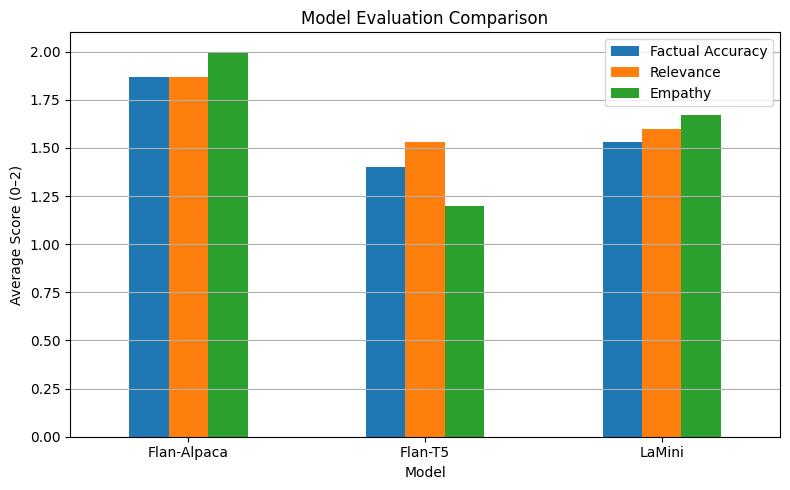

In [30]:
import matplotlib.pyplot as plt

# Plot bar chart
df_avg.plot(kind="bar", figsize=(8, 5), title="Model Evaluation Comparison")
plt.ylabel("Average Score (0–2)")
plt.ylim(0, 2.1)
plt.xticks(rotation=0)
plt.grid(axis='y')
plt.tight_layout()
plt.show()